In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import yaml

plt.style.use('fivethirtyeight')

In [8]:
os.chdir('../')

In [9]:
pwd

'c:\\Users\\Ayo Agbaje\\Documents\\Code\\Python\\GIGS\\PYTHON_docs\\py_files\\Car-Price-Project'

___Data Load___

In [10]:
with open('params.yaml') as config__:
    config_ = yaml.safe_load(config__)

In [11]:
df_ = pd.read_csv(config_['data']['data_file_1'])
df_.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [12]:
reset_cols_ = ['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
               'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
               'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
               'Airbags', 'Price']
df_ = df_[reset_cols_]

In [13]:
df_.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726


In [14]:
df_.isnull().sum()

ID                  0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Price               0
dtype: int64

_Data Analysis_

In [15]:
year_group_ = df_.groupby('Prod. year')
year_group_mean_ = year_group_.mean()
year_summary_ = year_group_mean_[['Price']]
year_summary_.head()

,Price
Prod. year,
1939,171.333333
1943,119172.000000
1947,150.000000
1953,17735.250000
1957,7527.000000


In [16]:
# plt.figure(figsize = (10,6))
# sns.histplot(x = 'Price', data = df_)

In [17]:
def bar_plot_(df__, title_, save_name):
    if len(df__) <= 5:
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 6))
        df__['Price'].plot.line(color = 'black', ax = ax, linewidth = 1.2)
        df__['Price'].plot.bar(ax = ax, color = 'grey')
        ax.tick_params(axis = 'x', rotation = 0)
        # ax.grid(axis = 'x')
        ax.bar_label(ax.containers[0])
        plt.title(title_, fontsize = 25)
        plt.ylabel('PRICE', fontsize = 25)
        # plt.savefig(save_name)

    elif len(df__) > 5:
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))
        df__['Price'].plot.line(color = 'black', ax = ax, linewidth = 1.2)
        df__['Price'].plot.bar(ax = ax, color = 'grey')
        ax.tick_params(axis = 'x', rotation = 90)
        # ax.grid(axis = 'x')
        # ax.bar_label(ax.containers[0])
        plt.title(title_, fontsize = 25)
        plt.ylabel('PRICE', fontsize = 25)
        # plt.savefig(save_name)


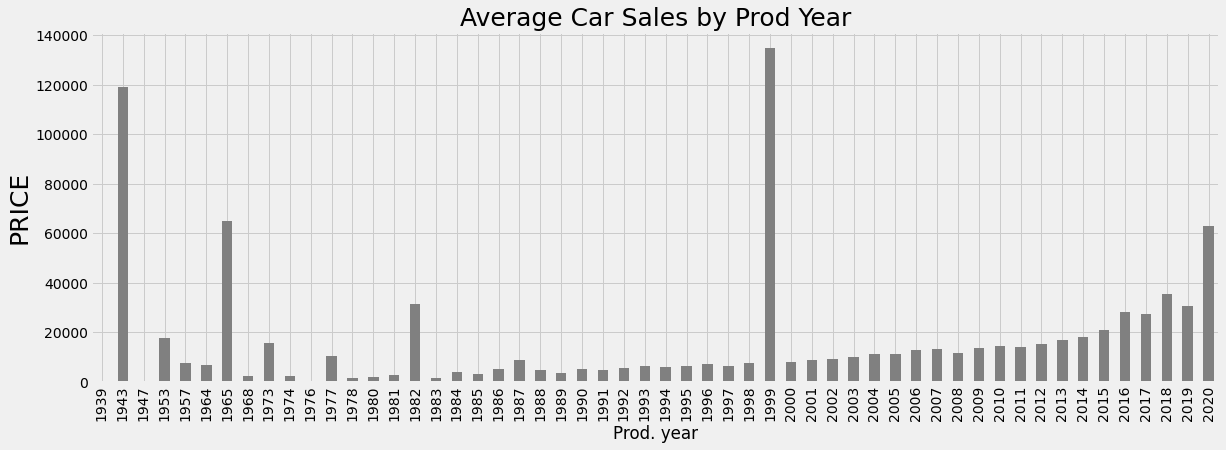

In [18]:
bar_plot_(df__ = year_summary_, title_ = 'Average Car Sales by Prod Year', save_name = 'prod_year_mean.jpeg')

In [19]:
manufacturer_group_ = df_.groupby('Manufacturer')
manufacturer_group_mean_ = manufacturer_group_.mean()
manufacturer_summary_ = manufacturer_group_mean_[['Price']]
manufacturer_summary_.head()

,Price
Manufacturer,
ACURA,5910.933333
ALFA ROMEO,9890.250000
ASTON MARTIN,54000.000000
AUDI,14106.545098
BENTLEY,197574.500000


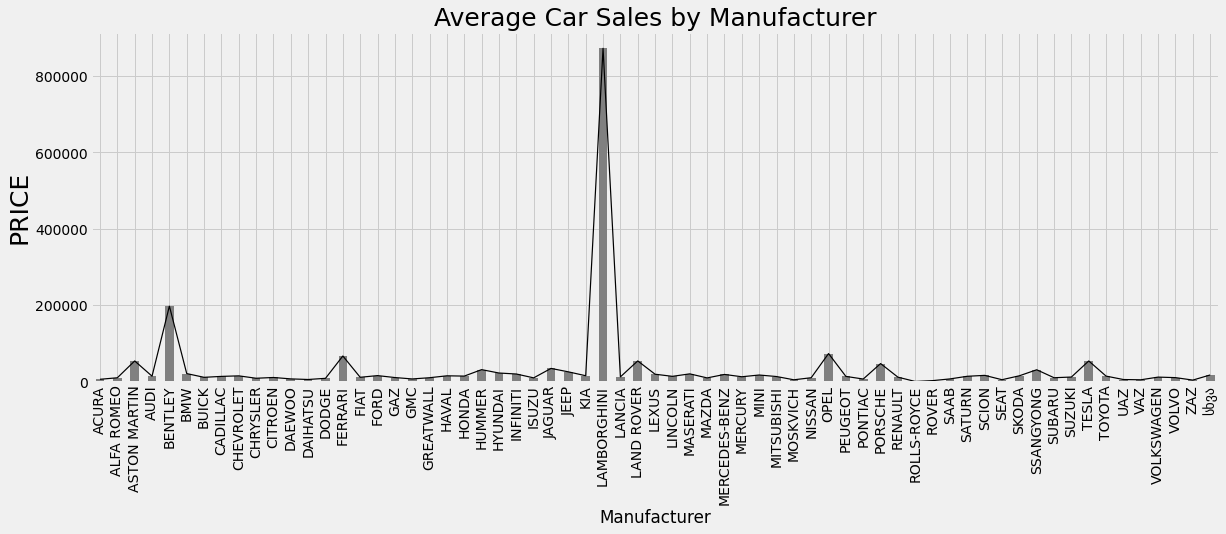

In [20]:
bar_plot_(df__ = manufacturer_summary_, title_ = 'Average Car Sales by Manufacturer', save_name = 'manufacturer_mean.jpeg')

In [21]:
def int_conv(col_):
    if col_ == '-':
        return np.nan
    else:
        return int(col_)

df_['Levy'] = df_['Levy'].apply(int_conv)

In [22]:
df_['Levy'] = df_['Levy'].fillna(value = df_['Levy'].mean())

In [23]:
corr_df = pd.DataFrame(data = df_.corrwith(df_['Price']), columns = ['Correlation with Price'])
corr_df = corr_df.sort_values(by = corr_df.columns[0] ,ascending=False)
corr_df

,Correlation with Price
Price,1.000000
Prod. year,0.012982
Cylinders,0.007518
Levy,0.005373
ID,-0.000844
Airbags,-0.012824


<AxesSubplot:>

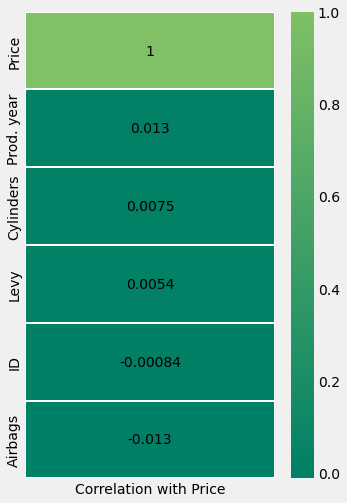

In [24]:
plt.figure(figsize = (5, 8))
sns.heatmap(corr_df, cmap = 'summer', annot = True, center = True, annot_kws = {'color': 'black'}, linewidth = .3)
# plt.savefig('heatmap.png')

In [25]:
def mileage_(col_):
    return int(col_.split(' ')[0])

df_['Mileage'] = df_['Mileage'].apply(mileage_)

In [26]:
def mileage_map_mini_(col_):
    if (col_ >= 0) & (col_ <= 10000):
        return 'Between 10km'
    elif (col_ > 10000) & (col_ <= 30000):
        return '10km to 30km'
    elif (col_ > 30000) & (col_ <= 100000):
        return '30km to 100km'
    elif (col_ > 100000):
        return '100km and above'

df_['Mileage'] = df_['Mileage'].map(mileage_map_mini_)

In [27]:
Mileage_group_ = df_.groupby('Mileage')
Mileage_group_mean_ = Mileage_group_.mean()
Mileage_summary_ = Mileage_group_mean_[['Price']]
Mileage_summary_.head()

,Price
Mileage,
100km and above,14138.227069
10km to 30km,27032.548087
30km to 100km,28281.170341
Between 10km,15726.772504


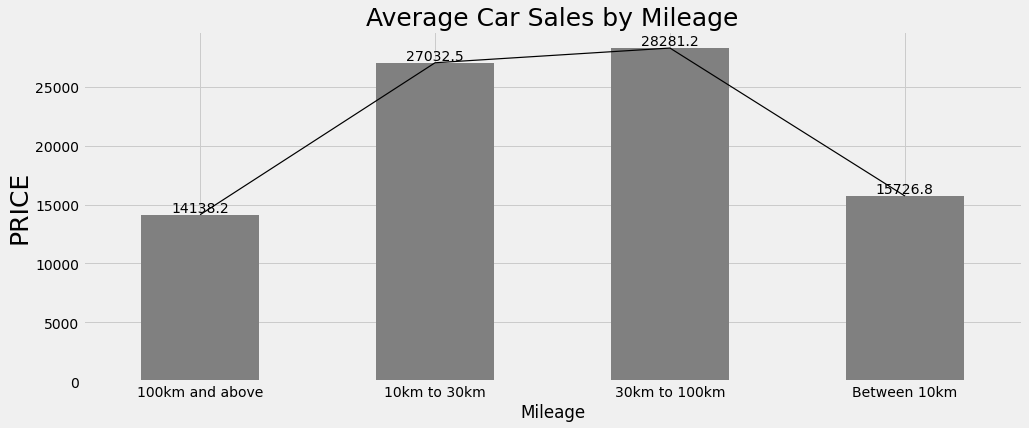

In [28]:
bar_plot_(df__ = Mileage_summary_, title_ = 'Average Car Sales by Mileage', save_name='ok')

array([<AxesSubplot:>], dtype=object)

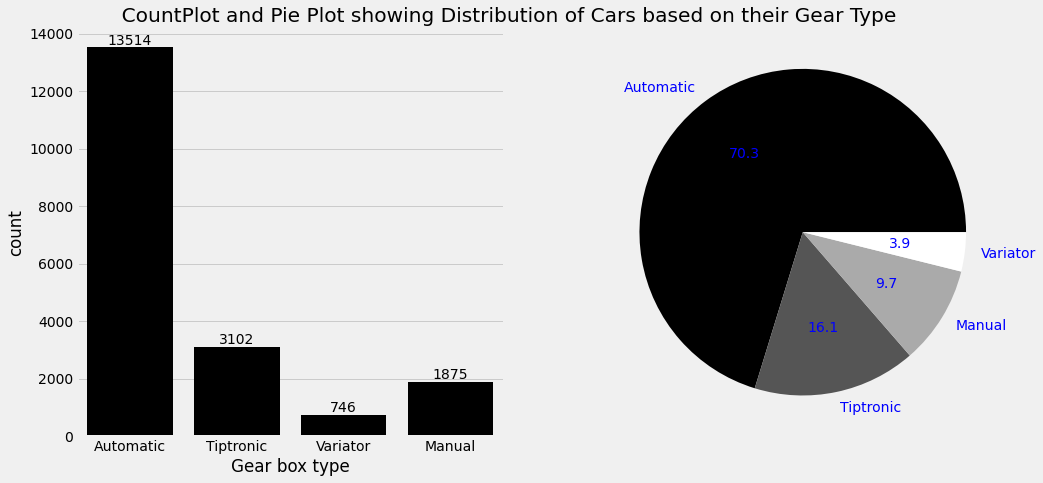

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
gear_df_ = pd.DataFrame(
    data = df_['Gear box type'].value_counts()
)
gear_df_.columns = ['Count']
gear_df_

sns.countplot(x = 'Gear box type', data = df_, ax = ax[0], color = 'black')
ax[0].bar_label(ax[0].containers[0], color = 'black')
ax[0].set_title('       CountPlot and Pie Plot showing Distribution of Cars based on their Gear Type', loc = 'left')
# ax

gear_df_['Count'].plot.pie(ylabel = '', autopct = '%.1f', cmap = 'gist_gray', subplots = True, ax = ax[1], textprops = {'color': 'blue'})


In [30]:
gear_group_ = df_.groupby('Gear box type')
gear_group_mean_ = gear_group_.mean()
gear_summary_ = gear_group_mean_[['Price']]
gear_summary_.head()

,Price
Gear box type,
Automatic,15974.326032
Manual,25614.896533
Tiptronic,26448.307221
Variator,14762.399464


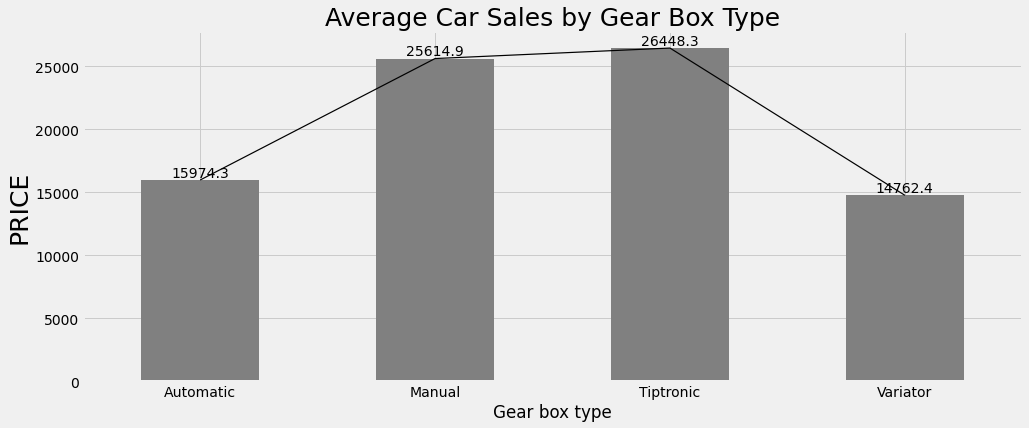

In [31]:
bar_plot_(df__ = gear_summary_, title_ = 'Average Car Sales by Gear Box Type', save_name = 'ok')

Text(0.5, 1.0, 'Plot Showing Presence of Outliers in the Price Column, by Color of the Car')

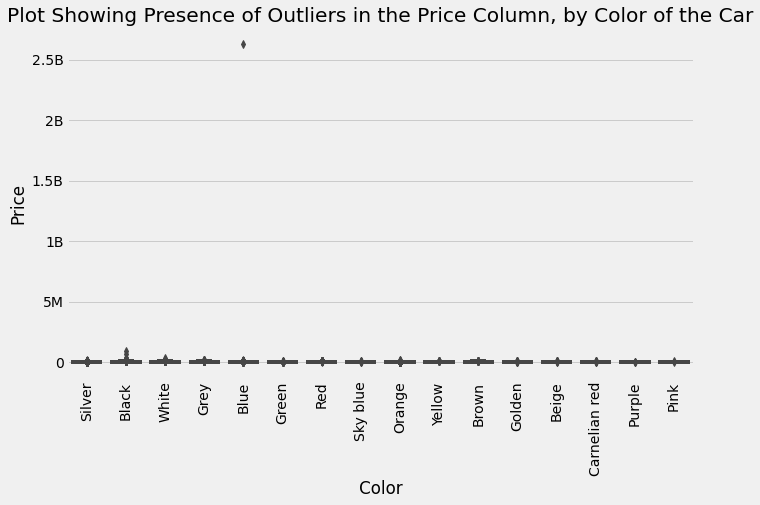

In [32]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Color', y = 'Price', data = df_)
plt.tick_params(axis='x', rotation = int('90'))
plt.yticks(np.arange(0e7, 2.6e7, 5000000),
           ['0', '5M', '1B', '1.5B', '2B', '2.5B'])
plt.title('Plot Showing Presence of Outliers in the Price Column, by Color of the Car')

In [33]:
df_.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [34]:
df_.describe(percentiles=[.45, .33]).T

,count,mean,std,min,33%,45%,50%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45734470.24,4.576842e+07,4.577231e+07,45816654.0
Levy,19237.0,9.068381e+02,385.733455,87.0,779.00,9.068381e+02,9.068381e+02,11714.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2010.00,2.012000e+03,2.012000e+03,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.00,4.000000e+00,4.000000e+00,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.00,4.000000e+00,6.000000e+00,16.0
Price,19237.0,1.855593e+04,190581.269684,1.0,7997.00,1.160400e+04,1.317200e+04,26307500.0


In [35]:
df_ = df_.sort_values(by = df_.columns[-1], ascending= False)
df_ = df_.reset_index()

In [36]:
df_ = df_.drop('index', axis = 1)
df_.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45812886,906.838128,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,30km to 100km,4.0,Manual,Front,02-Mar,Left wheel,Blue,0,26307500
1,45761204,2067.000000,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4,Between 10km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0,872946
2,45795524,906.838128,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3 Turbo,Between 10km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,627220
3,45810285,1694.000000,PORSCHE,911,2016,Coupe,Yes,Petrol,4,Between 10km,6.0,Automatic,Rear,02-Mar,Left wheel,Black,12,308906
4,45792307,906.838128,LAND ROVER,Range Rover Vogue,2019,Jeep,Yes,Diesel,3.0 Turbo,Between 10km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,297930


In [37]:
df_ = df_.drop(0, axis = 0)
df_.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
1,45761204,2067.000000,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4,Between 10km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0,872946
2,45795524,906.838128,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3 Turbo,Between 10km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,627220
3,45810285,1694.000000,PORSCHE,911,2016,Coupe,Yes,Petrol,4,Between 10km,6.0,Automatic,Rear,02-Mar,Left wheel,Black,12,308906
4,45792307,906.838128,LAND ROVER,Range Rover Vogue,2019,Jeep,Yes,Diesel,3.0 Turbo,Between 10km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,297930
5,45229113,906.838128,MERCEDES-BENZ,AMG GT S,2015,Coupe,Yes,Petrol,4.0 Turbo,10km to 30km,8.0,Tiptronic,Rear,02-Mar,Left wheel,White,16,297930


In [38]:
not_categorical_ = df_._get_numeric_data().columns
categorical_ = set(df_.columns).difference(not_categorical_)
print(categorical_)

{'Color', 'Manufacturer', 'Wheel', 'Doors', 'Gear box type', 'Leather interior', 'Drive wheels', 'Engine volume', 'Model', 'Category', 'Fuel type', 'Mileage'}


In [39]:
# sorted(df_['Engine volume'].unique())

In [40]:
def engine_size(col_):
    if ('Turbo' in col_) & (float(col_.split(' ')[0]) <= 3):
        turbo_ = '<= 3' + ' turbo'
        return turbo_
    elif ('Turbo' in col_) & (float(col_.split(' ')[0]) > 3) & (float(col_.split(' ')[0]) <= 5):
        turbo_ = '> 3 & <= 5' + ' turbo'
        return turbo_
    elif ('Turbo' in col_) & (float(col_.split(' ')[0]) > 5) & (float(col_.split(' ')[0]) <= 10):
        turbo_ = '> 5 and <= 10' + ' turbo'
        return turbo_
    elif ('Turbo' in col_) & (float(col_.split(' ')[0]) > 10):
        turbo_ = '> 10' + ' turbo'
        return turbo_
    elif 'Turbo' not in col_ and (float(col_) <= 3):
        turbo_ = '<= 3' + ' No turbo'
        return turbo_
    elif 'Turbo' not in col_ and (float(col_) > 3) and (float(col_) <= 5):
        turbo_ = '> 3 & <= 5' + ' No turbo'
        return turbo_
    elif 'Turbo' not in col_ and (float(col_) > 5) and (float(col_) <= 10):
        turbo_ = '> 5 & <= 10' + ' No turbo'
        return turbo_
    elif 'Turbo' not in col_ and (float(col_) > 10):
        turbo_ = '> 10' + ' No turbo'
        return turbo_
    
df_['Engine volume'] = df_['Engine volume'].apply(engine_size)

In [41]:
for i in categorical_:
    print(f"unique values of {i}; {df_[i].unique()}")

unique values of Color; ['Black' 'White' 'Silver' 'Grey' 'Blue' 'Orange' 'Brown' 'Carnelian red'
 'Red' 'Green' 'Yellow' 'Beige' 'Golden' 'Pink' 'Sky blue' 'Purple']
unique values of Manufacturer; ['LAMBORGHINI' 'MERCEDES-BENZ' 'PORSCHE' 'LAND ROVER' 'BMW' 'LEXUS'
 'BENTLEY' 'TOYOTA' 'JAGUAR' 'JEEP' 'FORD' 'HYUNDAI' 'HONDA' 'MITSUBISHI'
 'AUDI' 'CHEVROLET' 'OPEL' 'FERRARI' 'KIA' 'PEUGEOT' 'SUZUKI' 'VOLKSWAGEN'
 'MAZDA' 'HUMMER' 'SSANGYONG' 'ASTON MARTIN' 'TESLA' 'GAZ' 'MINI'
 'CADILLAC' 'NISSAN' 'SKODA' 'ACURA' 'SUBARU' 'INFINITI' 'LINCOLN'
 'RENAULT' 'MASERATI' 'GMC' 'BUICK' 'DODGE' 'CHRYSLER' 'VOLVO' 'FIAT'
 'სხვა' 'SCION' 'CITROEN' 'MERCURY' 'ALFA ROMEO' 'VAZ' 'MOSKVICH' 'HAVAL'
 'ISUZU' 'SATURN' 'DAEWOO' 'LANCIA' 'DAIHATSU' 'GREATWALL' 'UAZ' 'SAAB'
 'PONTIAC' 'SEAT' 'ZAZ' 'ROVER' 'ROLLS-ROYCE']
unique values of Wheel; ['Left wheel' 'Right-hand drive']
unique values of Doors; ['04-May' '02-Mar' '>5']
unique values of Gear box type; ['Tiptronic' 'Automatic' 'Manual' 'Variator']
uniqu

___Featurize___

In [42]:
category_map_ = {
    'Universal': 0,
    'Jeep': 1,
    'Coupe': 2,
    'Sedan': 3,
    'Pickup': 4,
    'Minivan': 5,
    'Goods wagon': 6,
    'Microbus': 7,
    'Cabriolet': 8,
    'Hatchback': 9,
    'Limousine': 10
}
manufacturer_map = {
    'LAMBORGHINI': 0,
    'MERCEDES-BENZ': 1,
    'PORSCHE': 2,
    'LAND ROVER': 3,
    'BMW': 4,
    'LEXUS': 5,
    'BENTLEY': 6,
    'TOYOTA': 7,
    'JAGUAR': 8,
    'JEEP': 9,
    'FORD': 10,
    'HYUNDAI': 11,
    'HONDA': 12,
    'MITSUBISHI': 13,
    'AUDI': 14,
    'CHEVROLET': 15,
    'OPEL': 16,
    'FERRARI': 17,
    'KIA': 18,
    'PEUGEOT': 19,
    'SUZUKI': 20,
    'VOLKSWAGEN': 21,
    'MAZDA': 22,
    'HUMMER': 23,
    'SSANGYONG': 24,
    'ASTON MARTIN': 25,
    'TESLA': 26,
    'GAZ': 27,
    'MINI': 28,
    'CADILLAC': 29,
    'NISSAN': 30,
    'SKODA': 31,
    'ACURA': 32,
    'SUBARU': 33,
    'INFINITI': 34,
    'LINCOLN': 35,
    'RENAULT': 36,
    'MASERATI': 37,
    'GMC': 38,
    'BUICK': 39,
    'DODGE': 40,
    'CHRYSLER': 41,
    'FIAT': 42,
    'VOLVO': 43,
    'სხვა': 44,
    'SCION': 45,
    'CITROEN': 46,
    'MERCURY': 47,
    'ALFA ROMEO': 48,
    'VAZ': 49,
    'MOSKVICH': 50,
    'HAVAL': 51,
    'ISUZU': 52,
    'SATURN': 53,
    'DAEWOO': 54,
    'LANCIA': 55,
    'DAIHATSU': 56,
    'GREATWALL': 57,
    'UAZ': 58,
    'SAAB': 59,
    'PONTIAC': 60,
    'SEAT': 61,
    'ZAZ': 62,
    'ROVER': 63,
    'ROLLS-ROYCE': 64
}
leather_map_ = {
    'Yes': 0,
    'No': 1
}
wheel_position_map = {
    'Left wheel': 0,
    'Right-hand drive': 1
}
engine_volume_map = {
    '> 3 & <= 5 No turbo': 0,
    '> 5 and <= 10 turbo': 1,
    '<= 3 turbo': 2,
    '> 3 & <= 5 turbo': 3,
    '> 5 & <= 10 No turbo': 4,
    '<= 3 No turbo': 5,
    '> 10 No turbo': 6
}
fuel_type_map_ = {
    'Petrol': 0,
    'Diesel': 1,
    'Hybrid': 2,
    'Plug-in Hybrid': 3,
    'LPG': 4,
    'CNG': 5,
    'Hydrogen': 6
}
drive_wheel_map_ = {
    '4x4': 0,
    'Rear': 1,
    'Front': 2
}
color_map_ = {
    'Black': 0,
    'White': 1,
    'Silver': 2,
    'Grey': 3,
    'Blue': 4,
    'Orange': 5,
    'Brown': 6,
    'Carnelian red': 7,
    'Red': 8,
    'Green': 9,
    'Yellow': 10,
    'Beige': 11,
    'Golden': 12,
    'Pink': 13,
    'Sky blue': 14,
    'Purple': 15
}
mileage_map_ = {
    'Between 10km': 0,
    '10km to 30km': 1,
    '30km to 100km': 2,
    '100km and above': 3
}
gear_map_ = {
    'Tiptronic': 0,
    'Automatic': 1,
    'Manual': 2,
    'Variator': 3
}
doors_map_ = {
    '04-May': 0,
    '02-Mar': 1,
    '>5': 2
}

In [43]:
df_.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [44]:
df_['Manufacturer'] = df_['Manufacturer'].map(manufacturer_map)
df_['Category'] = df_['Category'].map(category_map_)
df_['Leather interior'] = df_['Leather interior'].map(leather_map_)
df_['Fuel type'] = df_['Fuel type'].map(fuel_type_map_)
df_['Engine volume'] = df_['Engine volume'].map(engine_volume_map)
df_['Mileage'] = df_['Mileage'].map(mileage_map_)
df_['Gear box type'] = df_['Gear box type'].map(gear_map_)
df_['Drive wheels'] = df_['Drive wheels'].map(drive_wheel_map_)
df_['Doors'] = df_['Doors'].map(doors_map_)
df_['Wheel'] = df_['Wheel'].map(wheel_position_map)
df_['Color'] = df_['Color'].map(color_map_)

In [45]:
df_.tail()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
19232,45470589,906.838128,1,C 220,1998,3,1,1,5,1,4.0,2,1,0,0,0,2,3
19233,45612423,906.838128,11,Elantra,2011,3,0,0,5,2,4.0,0,2,0,0,3,6,3
19234,45765552,1502.000000,21,Jetta,2014,3,0,0,2,3,4.0,0,2,0,1,0,6,3
19235,45772201,1202.000000,15,Lacetti,2006,9,1,0,5,3,4.0,2,2,0,0,0,2,1
19236,45765530,906.838128,16,Astra,1999,3,0,0,5,3,4.0,2,2,0,0,2,4,1


In [46]:
model_df_ = pd.get_dummies(df_['Model'], drop_first = True)
model_df_.head()

,100,100 NX,1000,1111,114,116,118,"118 2,0",118 M-sport LCI,120,...,Zafira B,i20,i3,i40,iA isti,kona,macan,macan S,tC,xD
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# df__ = pd.concat([df_, model_df_], axis = 1)
# len(df_)

In [48]:
df__ = df_.drop(['ID', 'Model'], axis = 1)

In [49]:
import joblib, json

In [50]:
# help(json.dump)

In [51]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, explained_variance_score, mean_squared_error

In [52]:
X = df__.drop('Price', axis = 1).values
y = df__['Price'].values

In [53]:
scale_ = MinMaxScaler(feature_range=(0,1))
scale_.fit(X)
X = scale_.transform(X)

In [54]:
xgbr = XGBRegressor()

In [55]:
# cv = KFold(
#     n_splits = 5,
#     shuffle = True,
#     random_state = 42
# )
# score_ = cross_val_score(
#     estimator = xgbr,
#     X = X,
#     y = y,
#     cv = cv,
#     scoring = 'neg_mean_squared_error'
# )
# score_ = np.mean(score_)
# score_ = np.sqrt(-score_)
# print(score_)
score_ = 12140.103056350972
print(score_)

12140.103056350972


In [56]:
import skopt
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer, Real 

In [57]:
# for i in range(10):
#     search_space_ = {
#     'n_estimators': Integer(100, 500),
#     'max_depth': Integer(2, 10),
#     'learning_rate': Real(0.01, 1)
#     }
#     cv = KFold(
#             n_splits = 5,
#             shuffle = True,
#             random_state = 42
#         )
#     clf = BayesSearchCV(
#             estimator = xgbr,
#             search_spaces = search_space_,
#             cv = cv,
#             refit = True,
#             n_iter = 6,
#             scoring = 'neg_mean_squared_error'
#         )
#     clf.fit(X, y)
#     print(clf.best_params_, np.sqrt(-clf.best_score_))

In [58]:
from sklearn.feature_selection import RFE

In [59]:
# df__x.head(5)

* learning_rate = 0.25911329031077535, max_depth = 8, n_estimators = 169

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .23, random_state = 42)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14811, 15), (4425, 15), (14811,), (4425,))

In [62]:
xgbr_ = XGBRegressor(
    learning_rate = 0.25911329031077535,
    max_depth = 8,
    n_estimators = 169
)

In [63]:
xgbr_.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.25911329031077535, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=169, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [64]:
preds_ = xgbr_.predict(X_test)

In [65]:
evs = explained_variance_score(y_true=y_test, y_pred=preds_)
mae = mean_absolute_error(y_true=y_test, y_pred=preds_)
mse = mean_squared_error(y_true=y_test, y_pred=preds_)
rmse = np.sqrt(mse)

In [66]:
print(f"Explained variance score: {evs}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Explained variance score: 0.5660748313015843
Mean Absolute Error: 5031.537410253535
Mean Squared Error: 216355835.67429328
Root Mean Squared Error: 14709.039250552474


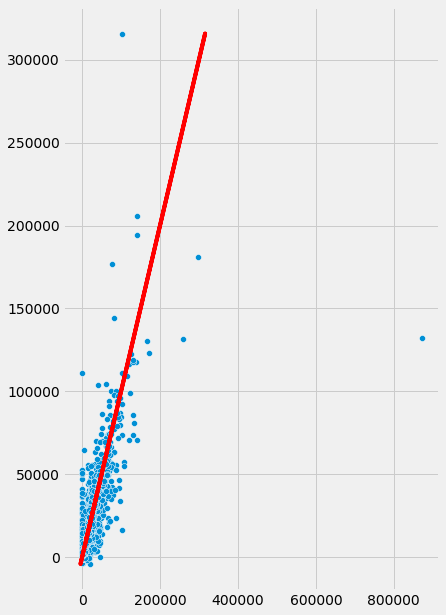

In [67]:
plt.figure(figsize = (6, 10))
sns.scatterplot(x = y_test, y = preds_)
plt.plot(preds_, preds_, color = 'red')

In [68]:
data = {
    'True Values': y_test,
    'Predicted Values': preds_
}
preds_df = pd.DataFrame(
    data = data
)
preds_df.sample(6)

,True Values,Predicted Values
1725,18519,15494.562500
2176,2195,2995.476318
3365,13799,10621.516602
1059,20385,16632.185547
3245,13328,12792.335938
1007,3000,6469.437500
